In [215]:
# Importando librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
pd.set_option('display.max_rows',None) # Opción donde podemos ver todos los datos
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Deshabilitando notación cientifica para pandas

In [138]:
# Leyendo los datos

df = pd.read_csv('movies.csv')

In [139]:
# Mirando un poco los datos (ordenado por ventas totales)
df.head(10).sort_values(by='gross',ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [140]:
# Revisando el tipo de dato que cargo por columna
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Arreglar data types:
1.- release : Debe ser fecha y mas encima viene con el país donde se estrenó

In [141]:
# Arreglando columna release : debe ser fecha y no objeto!
## Debemos obtener solo la fecha de la columna
## Ejemplo
df['released'][47].split(' \(')
## En este caso estoy seeparando por cada "espacio + parentesis", usaremos esta logica para sacar dos columnas, una para una fecha y otra para el país de release


['November 7, 1980 (United States)']

In [142]:
# Usamos split para crear dos columnas
df[['released','country_release']] = df['released'].str.split(' \(',n=1,expand=True)

In [143]:
# Limpiamos country_release
df['country_release'] = df['country_release'].str.replace(')','')

In [144]:
# Ahora que tenemos la fecha "aislada" podemos traspasarlo a fecha
df['released'] = pd.to_datetime(df['released'],format='mixed')

In [145]:
# Revisando data types denuevo, se observa que released ahroa es datetime!
df.dtypes

name                       object
rating                     object
genre                      object
year                        int64
released           datetime64[ns]
score                     float64
votes                     float64
director                   object
writer                     object
star                       object
country                    object
budget                    float64
gross                     float64
company                    object
runtime                   float64
country_release            object
dtype: object

In [146]:
# Podemos ver que released ahora tiene formato fecha numerica y obtuvimos una columna nueva : 'country_release'
df.head(10)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,United States
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,United States
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,United States
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,United States
5,Friday the 13th,R,Horror,1980,1980-05-09,6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,United States
6,The Blues Brothers,R,Action,1980,1980-06-20,7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0,United States
7,Raging Bull,R,Biography,1980,1980-12-19,8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,United States
8,Superman II,PG,Action,1980,1981-06-19,6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,United States
9,The Long Riders,R,Biography,1980,1980-05-16,7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,United States


In [147]:
# Viendo las clases de country_release
df['country_release'].unique()

array(['United States', 'Australia', 'Japan', 'Ireland', 'Argentina',
       'Soviet Union', 'United Kingdom', 'Sweden', 'France', 'Canada',
       'Brazil', 'South Korea', 'West Germany', 'Italy', 'Denmark',
       'Netherlands', 'Uruguay', 'Hong Kong', 'Taiwan', 'Yugoslavia',
       'Spain', 'Finland', 'South Africa', 'Philippines', 'Portugal',
       'Mexico', 'Germany', 'New Zealand', 'Iran', 'Greece', 'Singapore',
       'Poland', 'India', 'Federal Republic of Yugoslavia', 'Iceland',
       'Belgium', 'Israel', 'Hungary', 'China', 'Russia', 'Norway',
       'Austria', 'Thailand', 'Puerto Rico', 'Turkey', 'Romania',
       'Czech Republic', 'Latvia', 'Indonesia', 'Bahrain', 'Kazakhstan',
       nan, 'Malaysia', 'Croatia', 'Bulgaria', 'Lebanon',
       'United Arab Emirates', 'Ukraine', 'Bahamas', 'Kuwait', 'Vietnam',
       'Cameroon'], dtype=object)

In [148]:
# Revisando si hay datos faltantes

for col in df.columns:
    n_missing = df[col].isnull().sum()
    print("{} - {} datos faltantes".format(col,n_missing))

name - 0 datos faltantes
rating - 77 datos faltantes
genre - 0 datos faltantes
year - 0 datos faltantes
released - 2 datos faltantes
score - 3 datos faltantes
votes - 3 datos faltantes
director - 0 datos faltantes
writer - 3 datos faltantes
star - 1 datos faltantes
country - 3 datos faltantes
budget - 2171 datos faltantes
gross - 189 datos faltantes
company - 17 datos faltantes
runtime - 4 datos faltantes
country_release - 2 datos faltantes


Podemos notar que la columna budget tiene varios datos faltantes en comparación a las demás!. ¿Tal ves no deberíamos considerarla en nuestro analisis?


In [151]:
# Al revisar bien la columna "year" v/s "released" los años no cuadran, revisando por internet se detectó que "released" es la fecha correcta

df['year_corregido'] = df['released'].astype('str').str[:4]


df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,year_corregido
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980


In [152]:
# Revisando los años que obtuvimos, vemos que tenemos un "NaT"
df['year_corregido'].unique()

array(['1980', '1981', '1984', '1983', '1982', '1992', '1987', '1985',
       '1986', '1988', '1990', '1989', '2008', '1991', '1993', '1999',
       '2001', '2016', '1997', '1994', '1995', '1998', '2019', '1996',
       '2000', '2014', '2002', '2003', '2005', '2004', '2006', '2007',
       '2010', '2011', '2009', '2013', '2015', 'NaT', '2012', '2017',
       '2018', '2020'], dtype=object)

In [153]:
df[df['year_corregido'] == 'NaT']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,year_corregido
5728,Saw: The Final Chapter,R,Crime,2010,NaT,5.6,93000,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,<NA>,<NA>,NaN,NaN,NaN,NaT
5730,The Wolfman,R,Drama,2010,NaT,5.8,104000,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,<NA>,<NA>,NaN,NaN,NaN,NaT


In [154]:
# Al no tener una fecha, y solo "year" podemos hacer que en estos dos casos tome el valor year
df.loc[df['year_corregido'] == 'NaT', 'year_corregido'] = df['year']

In [155]:
# Se puede ver que ya no existen los "NaT" en la columna 'years_corregido'
df['year_corregido'].unique()

array(['1980', '1981', '1984', '1983', '1982', '1992', '1987', '1985',
       '1986', '1988', '1990', '1989', '2008', '1991', '1993', '1999',
       '2001', '2016', '1997', '1994', '1995', '1998', '2019', '1996',
       '2000', '2014', '2002', '2003', '2005', '2004', '2006', '2007',
       '2010', '2011', '2009', '2013', '2015', 2010, '2012', '2017',
       '2018', '2020'], dtype=object)

In [156]:
# Convertimos 'year_corregido' a valor entero
df['year_corregido'] = df['year_corregido'].astype('int64')

In [157]:
# Dropeamos la columna 'year'
df.drop(columns='year',inplace=True)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,year_corregido
0,The Shining,R,Drama,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980
1,The Blue Lagoon,R,Adventure,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980
3,Airplane!,PG,Comedy,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980
4,Caddyshack,R,Comedy,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980


In [158]:
# Ordenando df por 'gross'
df.sort_values(by='gross',ascending=False,inplace=True)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,year_corregido
5445,Avatar,PG-13,Action,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States,2019
3045,Titanic,PG-13,Drama,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States,2018


In [ ]:
# Eliminando cualquier duplicado (en base a todas las columnas)
df.drop_duplicates()

In [160]:
# Tenemos gross y budgets como "nan" lo cual nos podría dar errores mas adelante
# Para este caso los ELIMINAREMOS
df.dropna(subset=['gross', 'budget'],inplace=True)

# Correlación entre alguna variable y "ventas totales" de la película
Mi hipotesis es que mientras mas presupuesto, mejores resultados (gross) tendrá la película, también creo que la compañía influye mucho. Aunque, pensandolo bien, no estarán correlacionadas la variable presupuesto con compañía?

In [161]:
df.head(10)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,year_corregido
5445,Avatar,PG-13,Action,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States,2019
3045,Titanic,PG-13,Drama,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States,2018
7480,The Lion King,PG,Animation,2019-07-19,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,United States,2019
6653,Jurassic World,PG-13,Action,2015-06-12,7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,United States,2015
6043,The Avengers,PG-13,Action,2012-05-04,8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,United States,2012
6646,Furious 7,PG-13,Action,2015-04-03,7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,United States,2015
7494,Frozen II,PG,Animation,2019-11-22,6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,United States,2019


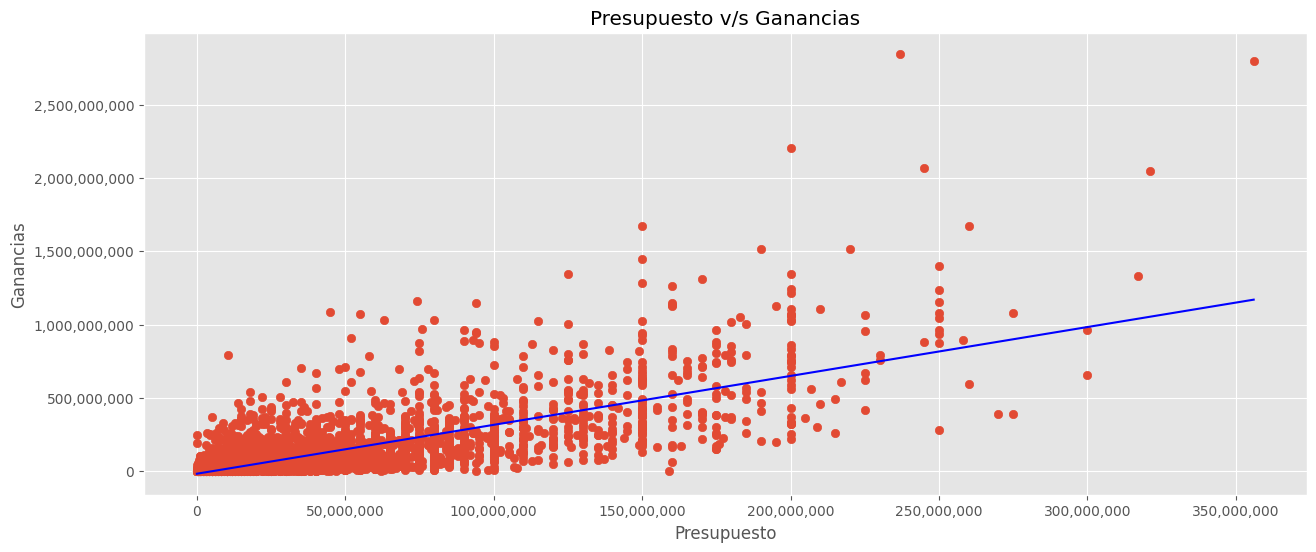

In [182]:
# Scatter plot para comparar budget vs gross
# Ajuste de regresión lineal
# Ojo, es importante pasar a lista la Serie de pandas o si no numpy no lo tomará!
valor_x = list(df['budget']) 
valor_y = list(df['gross'])
coeficientes = np.polyfit(valor_x,valor_y,1)
p = np.poly1d(coeficientes)
# Puntos para trazar línea de tendencia
x_line = np.linspace(df['budget'].min(),df['budget'].max())
y_line = p(x_line)

# Creando plot
plt.figure(figsize=(15, 6))
plt.scatter(x=df['budget'],y=df['gross'])
plt.plot(x_line,y_line,color='blue')
plt.title('Presupuesto v/s Ganancias')
plt.xlabel('Presupuesto')
plt.ylabel('Ganancias')
plt.ticklabel_format(style='plain') # Para prevenir notación cientifica

# Formateando los ejes
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.show()

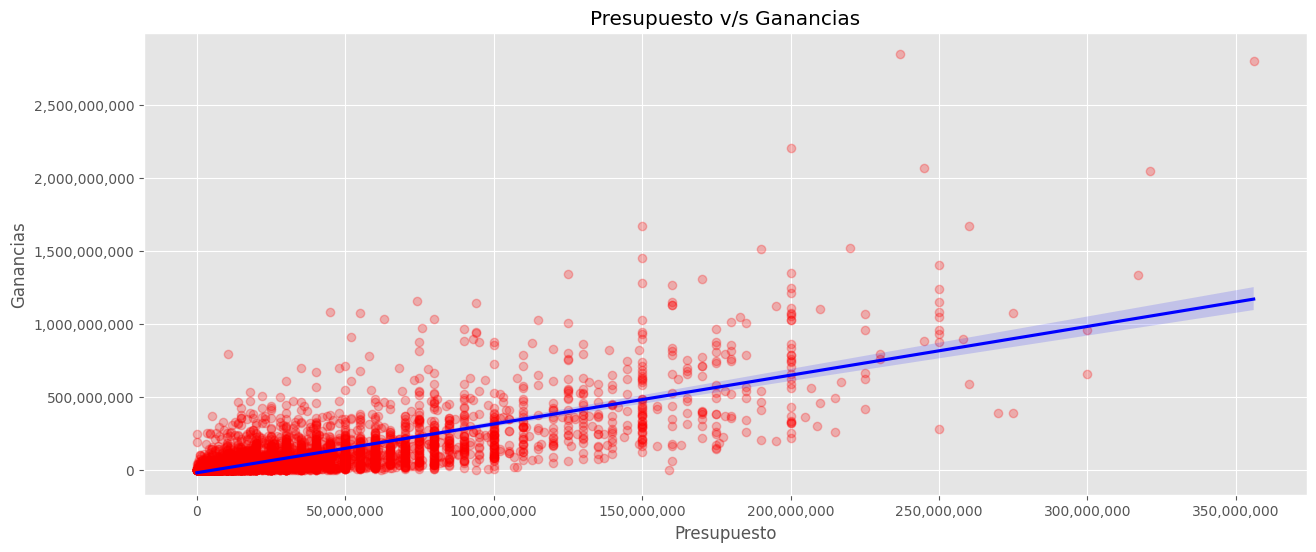

In [197]:
# Haciendo el grafico de la regresión con seaborn (más facil)
import seaborn as sns
df['budget'] = df['budget'].astype('float64') # Al parecer no nos habia tomado como "enteros" los numeros de estos valores!
df['gross'] = df['gross'].astype('float64')

# Grafico
plt.figure(figsize=(15, 6))
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red",'alpha': 0.25},line_kws={"color":"blue"})
plt.title('Presupuesto v/s Ganancias')
plt.xlabel('Presupuesto')
plt.ylabel('Ganancias')
plt.ticklabel_format(style='plain') # Para prevenir notación cientifica

# Formateando los ejes
ax = plt.gca() # Obtenemos los ejes
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))


Al parecer si hay una relación lineal entre presupuesto versus ganancias en este dataset!, mientras mayor sea el presupuesto, mayor la probabilida de que las ganancias sean mayores!

In [199]:
# Veamos la correlación (Pearson)
df.corr(numeric_only=True)

,score,votes,budget,gross,runtime,year_corregido
score,1.000000,0.473809,0.071792,0.222143,0.414580,0.061029
votes,0.473809,1.000000,0.440021,0.614904,0.352437,0.202883
budget,0.071792,0.440021,1.000000,0.740395,0.318595,0.320245
gross,0.222143,0.614904,0.740395,1.000000,0.275596,0.268626
runtime,0.414580,0.352437,0.318595,0.275596,1.000000,0.074432
year_corregido,0.061029,0.202883,0.320245,0.268626,0.074432,1.000000


Podemos ver que la corr entre gross y budget es de 0.74!, es alta.

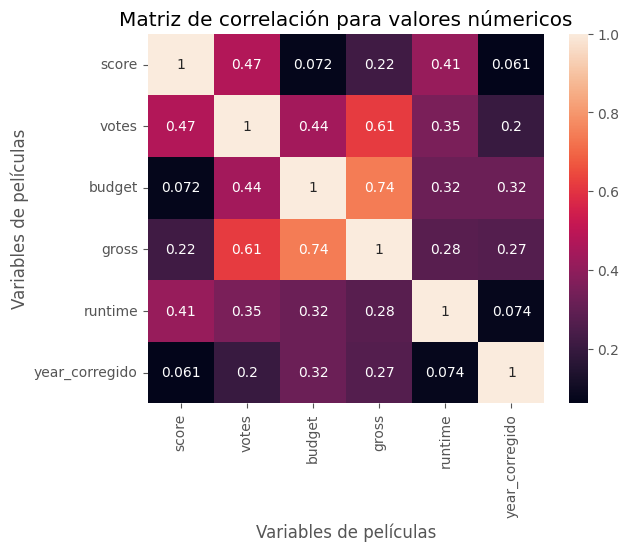

In [206]:
# Visualizando las correlaciones
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de correlación para valores númericos')
plt.xlabel('Variables de películas')
plt.ylabel('Variables de películas')

plt.show()

Gracias a la visualización se nos hace más facil ver que la correlación entre gross y budget existe!, además podemos ver que existe una correlación entre votos y ganancia!.

In [216]:
# Para poder considerar las demas variables categoricas en la correlación debemos codificarlas
df_codificada = df

for col_name in df_codificada.columns:
    if (df_codificada[col_name].dtype == 'object'):
        df_codificada[col_name] = df_codificada[col_name].astype('category')
        df_codificada[col_name] = df_codificada[col_name].cat.codes

df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,year_corregido
5445,387,5,0,2009-12-18,7.80,1100000,787,1265,1538,47,237000000.00,2847246203.00,1388,162.00,47,2009
7445,389,5,0,2019-04-26,8.40,903000,106,515,1474,47,356000000.00,2797501328.00,987,181.00,47,2019
3045,4923,5,6,1997-12-19,7.80,1100000,787,1265,1076,47,200000000.00,2201647264.00,1388,194.00,47,1997
6663,3656,5,0,2015-12-18,7.80,876000,770,1810,357,47,245000000.00,2069521700.00,949,138.00,47,2015
7244,390,5,0,2018-04-27,8.40,897000,106,515,1474,47,321000000.00,2048359754.00,987,149.00,47,2018


In [217]:
df_codificada.dtypes

name                        int16
rating                       int8
genre                        int8
released           datetime64[ns]
score                     float64
votes                       Int64
director                    int16
writer                      int16
star                        int16
country                      int8
budget                    float64
gross                     float64
company                     int16
runtime                   float64
country_release              int8
year_corregido              int64
dtype: object

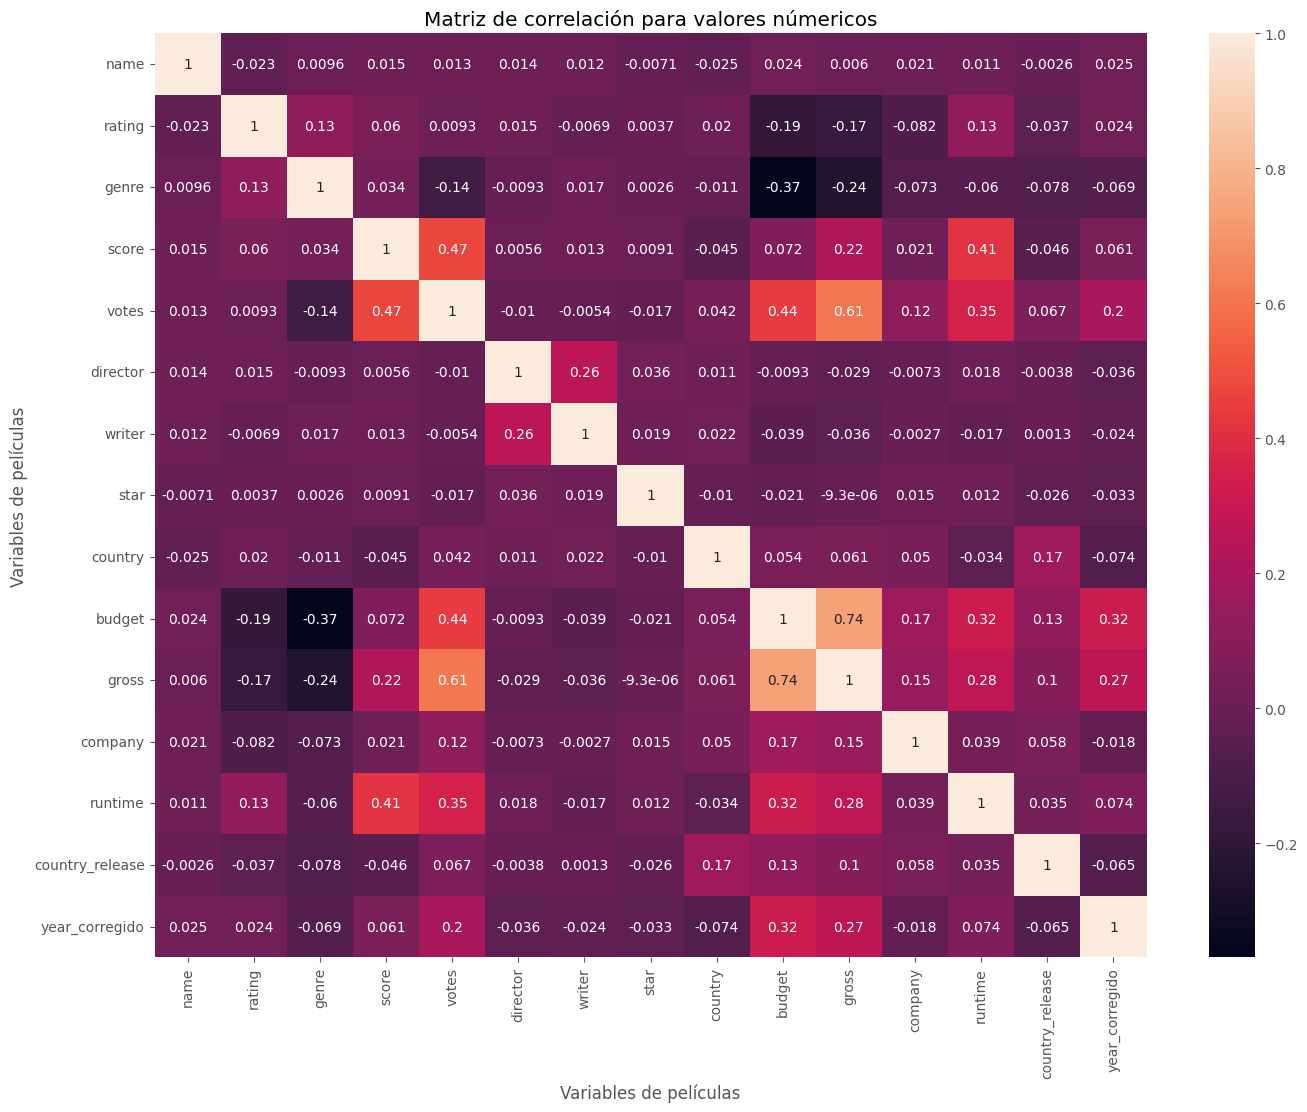

In [219]:
# Correlacion considerando las categorias codificadas
# Visualizando las correlaciones
corr_matrix = df_codificada.corr(numeric_only=True)
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de correlación para valores númericos')
plt.xlabel('Variables de películas')
plt.ylabel('Variables de películas')

plt.show()

In [224]:
# Podemos ver las correlaciones en forma "textual"
correlation_mat = df_codificada.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.sort_values(ascending=False)

name             name               1.00
rating           rating             1.00
country_release  country_release    1.00
runtime          runtime            1.00
company          company            1.00
gross            gross              1.00
budget           budget             1.00
country          country            1.00
star             star               1.00
writer           writer             1.00
director         director           1.00
votes            votes              1.00
score            score              1.00
released         released           1.00
genre            genre              1.00
year_corregido   year_corregido     1.00
released         year_corregido     1.00
year_corregido   released           1.00
gross            budget             0.74
budget           gross              0.74
gross            votes              0.61
votes            gross              0.61
score            votes              0.47
votes            score              0.47
budget          

In [231]:
# Veamos correlaciones mayores a 0.5 y menores a 1
corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 0.99)].sort_values(ascending=False)

budget  gross    0.74
gross   budget   0.74
votes   gross    0.61
gross   votes    0.61
dtype: float64

Podemos ver que votos y gross tenian una correlación que no nos habiamos dado cuenta!

Otra hipotesis que tenia (secretamente) era que dependiendo de la compañía tendriamos mas ventas o ganancias!, pero la correlación es baja (0.15) lo que al menos, con este DataFrame no nos indica que hay una correlación!